# Dimentionality Reduction

In [47]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

##### Dataset

In [2]:
iris=load_iris()
X=iris.data
y=iris.target

# A. Linear Methods 

### 1. PCA

In [4]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)

### 2.LDA

In [6]:
lda=LinearDiscriminantAnalysis(n_components=2,solver='svd')
X_lda = lda.fit_transform(X,y)

#### Visualization

Text(0.5, 1.0, 'LDA of Iris Dataset')

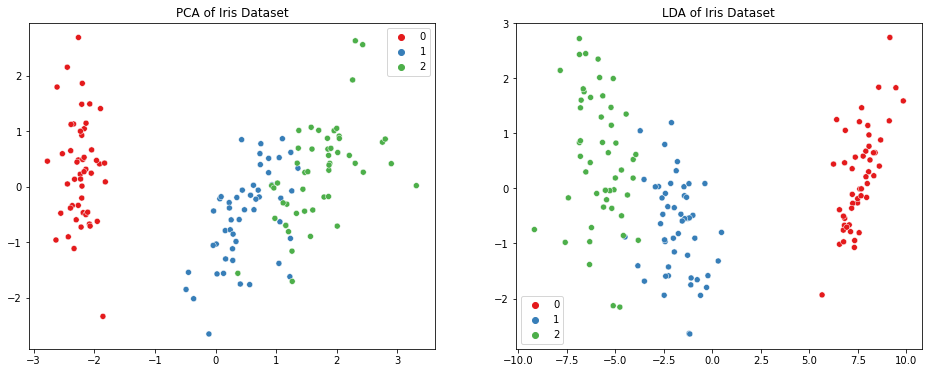

In [21]:
fig, ax=plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x_pca[:,0],x_pca[:,1],ax=ax[0],hue=y,palette='Set1')
sns.scatterplot(X_lda[:,0],X_lda[:,1],ax=ax[1],hue=y,palette='Set1')

ax[0].set_title('PCA of Iris Dataset')
ax[1].set_title('LDA of Iris Dataset')


### 3.Truncated SVD

In [22]:
from sklearn.decomposition import TruncatedSVD

svd=TruncatedSVD(n_components=2,algorithm='randomized',random_state=0)
x_svd=svd.fit_transform(X_scaled)

Text(0.5, 1.0, 'Truncated SVD of Iris Dataset')

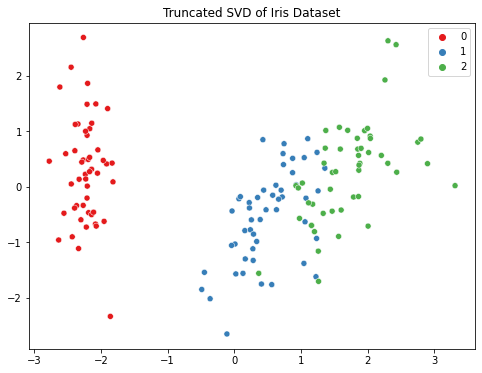

In [26]:
fig, ax=plt.subplots(1,1,figsize=(8,6))
sns.scatterplot(x_svd[:,0],x_svd[:,1],hue=y,palette='Set1')
ax.set_title('Truncated SVD of Iris Dataset')

# B. Non-linear Methods

### 1. Kernel PCA

<AxesSubplot:>

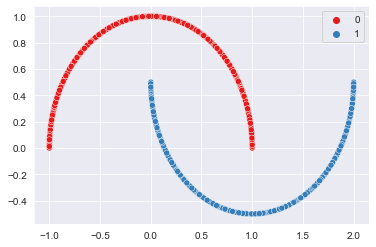

In [28]:
from sklearn.datasets import make_moons
sns.set_style('darkgrid')

x, y = make_moons(n_samples=500, random_state=45)
sns.scatterplot(x[:,0],x[:,1], hue=y, palette='Set1')

* It can be seen that two classes of above non-linear dataset cant be seperated by straight line
* lets perform PCA and kernel PCA on above dataset

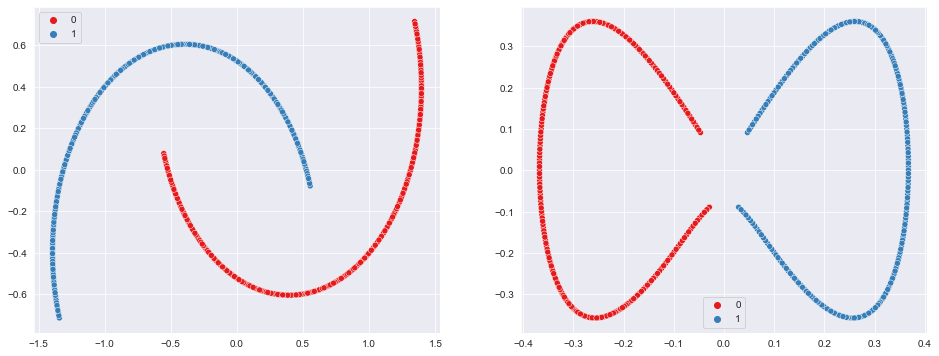

In [30]:
from sklearn.decomposition import KernelPCA

pca = PCA(n_components=2)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15, random_state=45)

x_pca = pca.fit_transform(x)
x_kpca = kpca.fit_transform(x)

fig, ax = plt.subplots(1,2,figsize=(16,6))

sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=y,palette='Set1',ax=ax[0])
sns.scatterplot(x_kpca[:,0],x_kpca[:,1],hue=y,palette='Set1',ax=ax[1])

ax[0].set_label('PCA')
ax[1].set_label('Kernel PCA')

### 2. t-SNE

In [31]:
from sklearn.manifold import TSNE

X_scaled = sc.fit_transform(X)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)

tsne=TSNE()
X_tsne=tsne.fit_transform(x_pca)

Text(0.5, 1.0, 'TSNE of Iris Dataset')

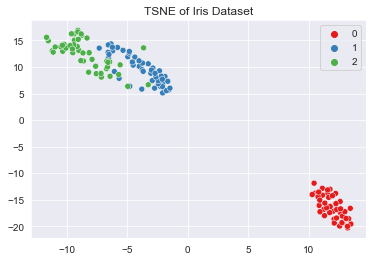

In [38]:
# can be simplifiesd using pipeline
from sklearn.pipeline import Pipeline

X=iris.data
y=iris.target

sc=StandardScaler()
pca=PCA()
tsne=TSNE(n_components=2,random_state=1)

tsne_after_pca=Pipeline([('std_scaler',sc),('PCA',pca),('TSNE',tsne)])

x_tsne=tsne_after_pca.fit_transform(X)

sns.scatterplot(x_tsne[:,0],x_tsne[:,1],hue=y, palette='Set1')
plt.title('TSNE of Iris Dataset')

### 3. MultiDimentional Scaling

Text(0.5, 1.0, 'MultiDimentional Scaling of Iris Dataset')

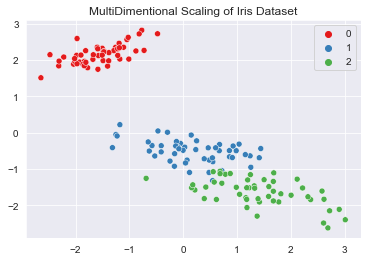

In [39]:
from sklearn.manifold import MDS

mds=MDS(n_components=2, metric=True, random_state=2)
x_mds=mds.fit_transform(X)

sns.scatterplot(x_mds[:,0],x_mds[:,1], hue=y, palette='Set1')
plt.title('MultiDimentional Scaling of Iris Dataset')

### 4. Isomatric Mapping

Text(0.5, 1.0, 'Isomap of Iris Dataset')

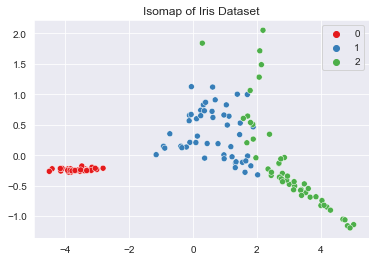

In [41]:
from sklearn.manifold import Isomap

iso=Isomap(n_neighbors=5, n_components=2, eigen_solver='auto')
x_iso= iso.fit_transform(X)

sns.scatterplot(x_iso[:,0],x_iso[:,1], hue=y, palette='Set1')
plt.title('Isomap of Iris Dataset')

### * Backward Elimination

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from yellowbrick.model_selection import feature_importances

Data with initial features
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Data with selected features
     0    1    2
0  3.5  1.4  0.2
1  3.0  1.4  0.2
2  3.2  1.3  0.2
3  3.1  1.5  0.2
4  3.6  1.4  0.2



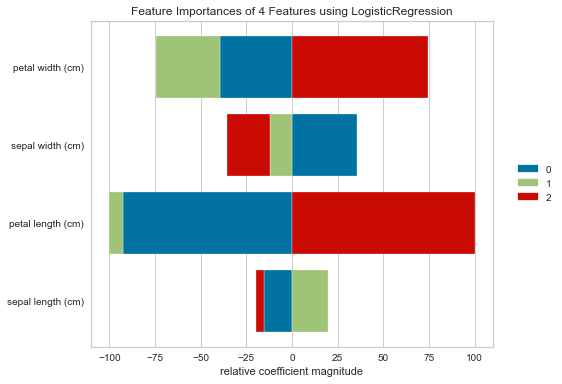

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 4 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>,
                   estimator=LogisticRegression(max_iter=150),
                   labels=['sepal length (cm)', 'sepal width (cm)',
                           'petal length (cm)', 'petal width (cm)'],
                   stack=True)


In [48]:
estimator=LogisticRegression(max_iter=150)
selector = RFE(estimator, n_features_to_select=3, step=1)
selector.fit(X,y)
x_selected = selector.transform(X)

print('Data with initial features')
print(pd.DataFrame(X, columns=iris.feature_names).head())
print()
print('Data with selected features')
print(pd.DataFrame(x_selected).head())
print()
print(feature_importances(estimator, X, y, stack=True, labels=iris.feature_names, relatives=False))

### * Forward Selection

In [49]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

X_selected = SelectKBest(f_classif, k=3).fit_transform(X,y)

#lets see F-value for each feature

print('F-values:', f_classif(X,y)[0])
print()
print('Data with initial features')
print(pd.DataFrame(X, columns=iris.feature_names).head())
print()
print('Data with selected features')
print(pd.DataFrame(x_selected).head())

F-values: [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]

Data with initial features
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Data with selected features
     0    1    2
0  3.5  1.4  0.2
1  3.0  1.4  0.2
2  3.2  1.3  0.2
3  3.1  1.5  0.2
4  3.6  1.4  0.2


### * Random Forest

Feature Importance: [0.08540008 0.01123495 0.45846811 0.44489686]
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Visualizing importanat features')

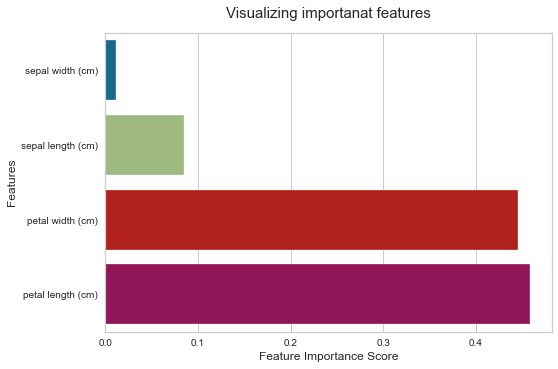

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=3, bootstrap=True, n_jobs=-1, random_state=0)
rfc.fit(X,y)

feature_imp = pd.Series(rfc.feature_importances_, index=iris.feature_names).sort_values(ascending=True)

print('Feature Importance:', rfc.feature_importances_)
print(sns.barplot(feature_imp, feature_imp.index ))
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Visualizing importanat features', fontsize=15, pad=15)

In [51]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rfc, threshold=0.05)
feature_important = selector.fit_transform(X,y)

print('Data with initial features')
print(pd.DataFrame(X, columns=iris.feature_names).head())
print()
print('Data with selected features')
print(pd.DataFrame(feature_important).head())

Data with initial features
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Data with selected features
     0    1    2
0  5.1  1.4  0.2
1  4.9  1.4  0.2
2  4.7  1.3  0.2
3  4.6  1.5  0.2
4  5.0  1.4  0.2


In [ ]:
#end